Torch Version: 2.6.0+cu126
CPU or Cuda: cuda
Random image path: Dataset\test_origin\test_origin\clean\0309_clean.jpg
Image class: clean
Image height: 3024
Image width: 4032
Train data:
Dataset ImageFolder
    Number of datapoints: 9000
    Root location: Dataset/train/train/all
    StandardTransform
Transform: Compose(
               Resize(size=(248, 248), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 1000
    Root location: Dataset/test/test
    StandardTransform
Transform: Compose(
               Resize(size=(248, 248), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Class names:  ['clean', 'moire']
Class names as a dict:  {'clean': 0, 'moire': 1}
The lengths of the training and test sets:  9000 1000


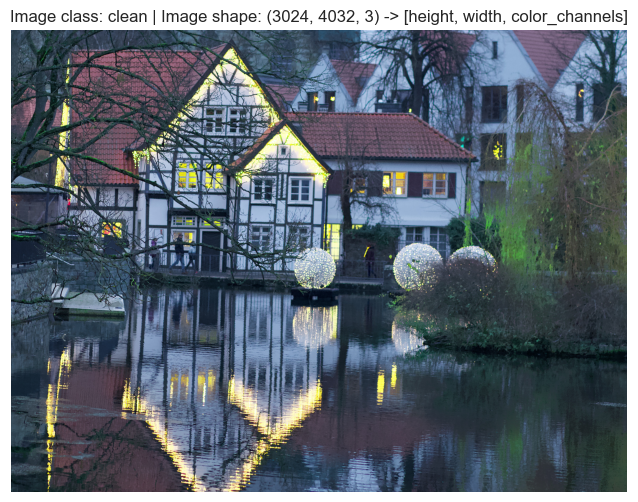

In [11]:
#import dependencies
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import random
from PIL import Image
import glob
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import datasets


#version of torch
print (f"Torch Version: {torch.__version__}")

#device (prints cuda if GPU is available otherwise prints CPU)
device = "cuda" if torch.cuda.is_available() else "cpu"
print (f"CPU or Cuda: {device}")

#function to list all directories in directory
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
    
#print all directories in dataset
image_path = "Dataset"
#walk_through_dir(image_path)

#training and testing directories
train_dir = "Dataset/train/train/all"
test_dir = "Dataset/test/test"

# Set seed
random.seed(42) 

# 1. Get all image paths (* means "any combination")
image_path_list= glob.glob(f"{image_path}/*/*/*/*.jpg")

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = Path(random_image_path).parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

sns.set_theme()

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)

IMAGE_WIDTH=248
IMAGE_HEIGHT=248
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)

# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to IMAGE_SIZE xIMAGE_SIZE 
    transforms.Resize(size=IMAGE_SIZE),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0 
])

# Creating training set
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)
#Creating test set
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

# Get class names as a list
class_names = train_data.classes
print("Class names: ",class_names)

# Can also get class names as a dict
class_dict = train_data.class_to_idx
print("Class names as a dict: ",class_dict)

# Check the lengths
print("The lengths of the training and test sets: ", len(train_data), len(test_data))


In [14]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.6314, 0.6314, 0.6353,  ..., 0.3569, 0.3333, 0.3020],
         [0.6275, 0.6275, 0.6235,  ..., 0.3608, 0.3333, 0.2980],
         [0.6157, 0.6196, 0.6157,  ..., 0.4078, 0.3569, 0.3098],
         ...,
         [0.5882, 0.5922, 0.5922,  ..., 0.5843, 0.5882, 0.5922],
         [0.5765, 0.5765, 0.5804,  ..., 0.5843, 0.5804, 0.5882],
         [0.5686, 0.5686, 0.5765,  ..., 0.5922, 0.5882, 0.5882]],

        [[0.6824, 0.6824, 0.6824,  ..., 0.3961, 0.3725, 0.3412],
         [0.6745, 0.6745, 0.6745,  ..., 0.4078, 0.3725, 0.3373],
         [0.6627, 0.6627, 0.6627,  ..., 0.4627, 0.4000, 0.3529],
         ...,
         [0.6353, 0.6353, 0.6353,  ..., 0.6275, 0.6275, 0.6314],
         [0.6275, 0.6275, 0.6275,  ..., 0.6275, 0.6235, 0.6275],
         [0.6196, 0.6196, 0.6275,  ..., 0.6353, 0.6275, 0.6275]],

        [[0.7059, 0.7059, 0.7059,  ..., 0.4314, 0.4078, 0.3765],
         [0.7020, 0.6980, 0.6980,  ..., 0.4471, 0.4118, 0.3725],
         [0.6941, 0.6941, 0.6902,  ..., 0.50

Original shape: torch.Size([3, 124, 124]) -> [color_channels, height, width]
Image permute shape: torch.Size([124, 124, 3]) -> [height, width, color_channels]


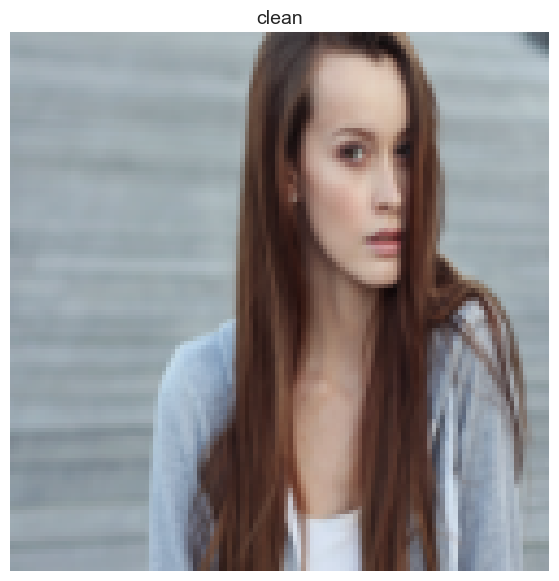

In [15]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

In [16]:
from torch.utils.data import DataLoader

# How many subprocesses will be used for data loading (higher = more)
NUM_WORKERS = os.cpu_count()

print(os.cpu_count())

# Turn train and test Datasets into DataLoaders
train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=1, # how many samples per batch?
                              num_workers=NUM_WORKERS,
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data, 
                             batch_size=1, 
                             num_workers=NUM_WORKERS, 
                             shuffle=False) # don't usually need to shuffle testing data

train_dataloader, test_dataloader

24


(<torch.utils.data.dataloader.DataLoader at 0x1f7b2aaf920>,
 <torch.utils.data.dataloader.DataLoader at 0x1f7b53b98b0>)

In [17]:
img, label = next(iter(train_dataloader))

# Note that batch size will now be 1.  
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 124, 124]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


In [18]:
# Set image size.
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)

# Create training transform with TrivialAugment
train_transform = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.TrivialAugmentWide(),
    transforms.ToTensor()])

# Create testing transform (no data augmentation)
test_transform = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.ToTensor()])

In [19]:
# Turn image folders into Datasets
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform)
test_data_augmented = datasets.ImageFolder(test_dir, transform=test_transform)

train_data_augmented, test_data_augmented

(Dataset ImageFolder
     Number of datapoints: 9000
     Root location: Dataset/train/train/all
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 1000
     Root location: Dataset/test/test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [20]:
# Set some parameters.
BATCH_SIZE = 32
torch.manual_seed(42)

train_dataloader_augmented = DataLoader(train_data_augmented, 
                                        batch_size=BATCH_SIZE, 
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_augmented = DataLoader(test_data_augmented, 
                                       batch_size=BATCH_SIZE, 
                                       shuffle=False, 
                                       num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader_augmented

(<torch.utils.data.dataloader.DataLoader at 0x1f7ad2b0e30>,
 <torch.utils.data.dataloader.DataLoader at 0x1f7b2897020>)

In [21]:
# Creating a CNN-based image classifier.
class ImageClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_layer_1 = nn.Sequential(
          nn.Conv2d(3, 64, 3, padding=1),
          nn.ReLU(),
          nn.BatchNorm2d(64),
          nn.MaxPool2d(2))
        self.conv_layer_2 = nn.Sequential(
          nn.Conv2d(64, 512, 3, padding=1),
          nn.ReLU(),
          nn.BatchNorm2d(512),
          nn.MaxPool2d(2))
        self.conv_layer_3 = nn.Sequential(
          nn.Conv2d(512, 512, kernel_size=3, padding=1),
          nn.ReLU(),
          nn.BatchNorm2d(512),
          nn.MaxPool2d(2)) 
        self.classifier = nn.Sequential(
          nn.Flatten(),
          nn.Linear(in_features=512*3*3, out_features=2))
    def forward(self, x: torch.Tensor):
        x = self.conv_layer_1(x)
        x = self.conv_layer_2(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_3(x)
        x = self.classifier(x)
        return x
# Instantiate an object.
model = ImageClassifier().to(device)

In [22]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader_augmented))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model.eval()
with torch.inference_mode():
    pred = model(img_single.to(device))
    
# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 224, 224])

Output logits:
tensor([[-0.0112, -0.0100]], device='cuda:0')

Output prediction probabilities:
tensor([[0.4997, 0.5003]], device='cuda:0')

Output prediction label:
tensor([1], device='cuda:0')

Actual label:
1


In [23]:
# Install torchinfo if it's not available, import it if it is
try: 
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo
    
from torchinfo import summary
# do a test pass through of an example input size 
summary(model, input_size=[1, 3, IMAGE_WIDTH ,IMAGE_HEIGHT]) 

Layer (type:depth-idx)                   Output Shape              Param #
ImageClassifier                          [1, 2]                    --
├─Sequential: 1-1                        [1, 64, 112, 112]         --
│    └─Conv2d: 2-1                       [1, 64, 224, 224]         1,792
│    └─ReLU: 2-2                         [1, 64, 224, 224]         --
│    └─BatchNorm2d: 2-3                  [1, 64, 224, 224]         128
│    └─MaxPool2d: 2-4                    [1, 64, 112, 112]         --
├─Sequential: 1-2                        [1, 512, 56, 56]          --
│    └─Conv2d: 2-5                       [1, 512, 112, 112]        295,424
│    └─ReLU: 2-6                         [1, 512, 112, 112]        --
│    └─BatchNorm2d: 2-7                  [1, 512, 112, 112]        1,024
│    └─MaxPool2d: 2-8                    [1, 512, 56, 56]          --
├─Sequential: 1-3                        [1, 512, 28, 28]          --
│    └─Conv2d: 2-9                       [1, 512, 56, 56]          2,359,

In [24]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)
        
        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [25]:
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [26]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [27]:
# Set random seeds
torch.manual_seed(11) 
torch.cuda.manual_seed(11)

# Set number of epochs
NUM_EPOCHS = 30

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=1e-3)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
model_results = train(model=model,
                      train_dataloader=train_dataloader_augmented,
                      test_dataloader=test_dataloader_augmented,
                      optimizer=optimizer,
                      loss_fn=loss_fn,
                      epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.7053 | train_acc: 0.6852 | test_loss: 0.6263 | test_acc: 0.6348
Epoch: 2 | train_loss: 0.5919 | train_acc: 0.7258 | test_loss: 0.5506 | test_acc: 0.7422
Epoch: 3 | train_loss: 0.5274 | train_acc: 0.7516 | test_loss: 0.6421 | test_acc: 0.6533
Epoch: 4 | train_loss: 0.4939 | train_acc: 0.7711 | test_loss: 0.4676 | test_acc: 0.7686
Epoch: 5 | train_loss: 0.4547 | train_acc: 0.7861 | test_loss: 0.4521 | test_acc: 0.7959
Epoch: 6 | train_loss: 0.4433 | train_acc: 0.7914 | test_loss: 0.4273 | test_acc: 0.7842
Epoch: 7 | train_loss: 0.4243 | train_acc: 0.8035 | test_loss: 0.9647 | test_acc: 0.5254
Epoch: 8 | train_loss: 0.3945 | train_acc: 0.8189 | test_loss: 0.4087 | test_acc: 0.8125
Epoch: 9 | train_loss: 0.4036 | train_acc: 0.8141 | test_loss: 0.4999 | test_acc: 0.7598
Epoch: 10 | train_loss: 0.3749 | train_acc: 0.8302 | test_loss: 0.5819 | test_acc: 0.6943
Epoch: 11 | train_loss: 0.3780 | train_acc: 0.8298 | test_loss: 0.5377 | test_acc: 0.7510
Epoch: 12 | train_l

In [28]:
folder = "models"
base_filename = "moire_model.pth"
counter = 1

# Ensure the folder exists
os.makedirs(folder, exist_ok=True)

# Create the full file path
file_path = os.path.join(folder, base_filename)

# Check if the file exists and increment the counter if needed
while os.path.exists(file_path):
    file_path = os.path.join(folder, f"moire_model_{counter}.pth")
    counter += 1

# Save the model
torch.save(model.state_dict(), file_path)

In [29]:
def plot_loss_curves(results, counter):
    results = dict(list(results.items()))

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

    # Ensure the 'models' folder exists
    os.makedirs("models", exist_ok=True)

    # Define the save path with a unique counter in the filename
    save_path = os.path.join("models", f"loss_accuracy_plot_{str(counter - 1).zfill(3)}.png")

    # Save the plot to the models folder with the unique filename
    plt.savefig(save_path)

    # Optionally close the plot to free memory
    plt.close()

    print(f"Plot saved to: {save_path}")

In [30]:
plot_loss_curves(model_results, counter)

Plot saved to: models\loss_accuracy_plot_003.png


In [31]:
# Choose a image.
custom_image_path = "Dataset/test_origin/test_origin/moire/0000_moire.jpg"

import torchvision
# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255. 

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.7020, 0.7020, 0.6980,  ..., 0.8353, 0.8353, 0.8392],
         [0.7059, 0.7059, 0.7020,  ..., 0.8431, 0.8392, 0.8353],
         [0.6941, 0.6941, 0.6941,  ..., 0.8431, 0.8431, 0.8392],
         ...,
         [0.1490, 0.1412, 0.1451,  ..., 0.0196, 0.0157, 0.0431],
         [0.1529, 0.1490, 0.1490,  ..., 0.0392, 0.0510, 0.0667],
         [0.1725, 0.1529, 0.1451,  ..., 0.0471, 0.0667, 0.0549]],

        [[0.7961, 0.7961, 0.7922,  ..., 0.7961, 0.7961, 0.8000],
         [0.8000, 0.8000, 0.7961,  ..., 0.8039, 0.8000, 0.7961],
         [0.7961, 0.7961, 0.7882,  ..., 0.8039, 0.8039, 0.8000],
         ...,
         [0.1922, 0.1843, 0.1882,  ..., 0.1412, 0.1373, 0.1647],
         [0.1961, 0.1922, 0.1922,  ..., 0.1608, 0.1725, 0.1882],
         [0.2157, 0.1961, 0.1882,  ..., 0.1686, 0.1882, 0.1765]],

        [[0.8039, 0.8039, 0.8000,  ..., 0.7882, 0.7882, 0.7922],
         [0.8078, 0.8078, 0.8039,  ..., 0.7961, 0.7922, 0.7882],
         [0.8000, 0.8000, 0.7961,  ..

In [32]:
custom_image_transform = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 3024, 4032])
New shape: torch.Size([3, 224, 224])


In [33]:
model.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)
    
    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")
    
    # Make a prediction on image with an extra dimension
    custom_image_pred = model(custom_image_transformed.unsqueeze(dim=0).to(device))

Custom image transformed shape: torch.Size([3, 224, 224])
Unsqueezed custom image shape: torch.Size([1, 3, 224, 224])


In [34]:
custom_image_pred

tensor([[-0.1044, -0.1327]], device='cuda:0')

In [35]:
# Let's convert them from logits -> prediction probabilities -> prediction labels
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

Prediction logits: tensor([[-0.1044, -0.1327]], device='cuda:0')
Prediction probabilities: tensor([[0.5071, 0.4929]], device='cuda:0')
Prediction label: tensor([0], device='cuda:0')


In [36]:
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class

'clean'

(-0.5, 4031.5, 3023.5, -0.5)

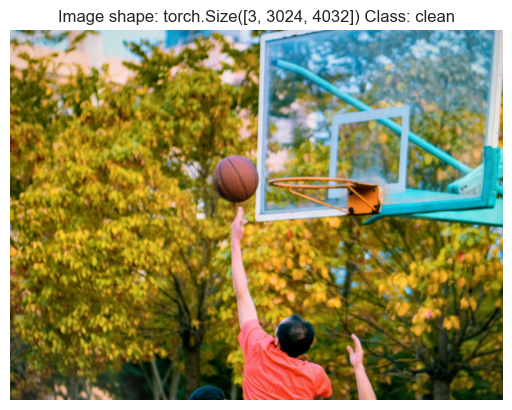

In [37]:
# Plot custom image
plt.imshow(custom_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image.shape} Class: {custom_image_pred_class}")
plt.axis(False)

In [38]:
import torchvision

directory = "Dataset/test_origin/test_origin/clean"

moire = 0
clean = 0

# Iterate over each file in the directory
for filename in os.listdir(directory):
    # Construct full file path
    file_path = os.path.join(directory, filename)
    
    # Check if it is a file (not a directory)
    if os.path.isfile(file_path):
        print(f"Found file: {filename}")

    custom_image_path = file_path

    # Load in custom image and convert the tensor values to float32
    custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

    # Divide the image pixel values by 255 to get them between [0, 1]
    custom_image = custom_image / 255. 

    custom_image_transform = transforms.Compose([
        transforms.Resize(IMAGE_SIZE),
    ])

    # Transform target image
    custom_image_transformed = custom_image_transform(custom_image)

    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to image
        custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)
        
        # Make a prediction on image with an extra dimension
        custom_image_pred = model(custom_image_transformed.unsqueeze(dim=0).to(device))

        # Let's convert them from logits -> prediction probabilities -> prediction labels

    # Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)

    # Convert prediction probabilities -> prediction labels
    custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)

    custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
    custom_image_pred_class

    if custom_image_pred_class == "moire":
        moire += 1
    else:
        clean += 1

    print(f"moire: {moire} clean: {clean}")

Found file: 0000_clean.jpg
moire: 0 clean: 1
Found file: 0001_clean.jpg
moire: 0 clean: 2
Found file: 0002_clean.jpg
moire: 0 clean: 3
Found file: 0003_clean.jpg
moire: 0 clean: 4
Found file: 0004_clean.jpg
moire: 0 clean: 5
Found file: 0005_clean.jpg
moire: 0 clean: 6
Found file: 0006_clean.jpg
moire: 0 clean: 7
Found file: 0007_clean.jpg
moire: 0 clean: 8
Found file: 0008_clean.jpg
moire: 0 clean: 9
Found file: 0009_clean.jpg
moire: 0 clean: 10
Found file: 0010_clean.jpg
moire: 0 clean: 11
Found file: 0011_clean.jpg
moire: 0 clean: 12
Found file: 0012_clean.jpg
moire: 0 clean: 13
Found file: 0013_clean.jpg
moire: 0 clean: 14
Found file: 0014_clean.jpg
moire: 0 clean: 15
Found file: 0015_clean.jpg
moire: 0 clean: 16
Found file: 0016_clean.jpg
moire: 0 clean: 17
Found file: 0017_clean.jpg
moire: 0 clean: 18
Found file: 0018_clean.jpg
moire: 0 clean: 19
Found file: 0019_clean.jpg
moire: 0 clean: 20
Found file: 0020_clean.jpg
moire: 0 clean: 21
Found file: 0021_clean.jpg
moire: 0 clean: 

In [39]:
directory = "Dataset/test_origin/test_origin/moire"

moire = 0
clean = 0

# Iterate over each file in the directory
for filename in os.listdir(directory):
    # Construct full file path
    file_path = os.path.join(directory, filename)
    
    # Check if it is a file (not a directory)
    if os.path.isfile(file_path):
        print(f"Found file: {filename}")

    custom_image_path = file_path

    # Load in custom image and convert the tensor values to float32
    custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

    # Divide the image pixel values by 255 to get them between [0, 1]
    custom_image = custom_image / 255. 

    custom_image_transform = transforms.Compose([
        transforms.Resize(IMAGE_SIZE),
    ])

    # Transform target image
    custom_image_transformed = custom_image_transform(custom_image)

    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to image
        custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)
        
        # Make a prediction on image with an extra dimension
        custom_image_pred = model(custom_image_transformed.unsqueeze(dim=0).to(device))

        # Let's convert them from logits -> prediction probabilities -> prediction labels

    # Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)

    # Convert prediction probabilities -> prediction labels
    custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)

    custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
    custom_image_pred_class

    if custom_image_pred_class == "moire":
        moire += 1
    else:
        clean += 1

    print(f"moire: {moire} clean: {clean}")

Found file: 0000_moire.jpg
moire: 0 clean: 1
Found file: 0001_moire.jpg
moire: 1 clean: 1
Found file: 0002_moire.jpg
moire: 2 clean: 1
Found file: 0003_moire.jpg
moire: 3 clean: 1
Found file: 0004_moire.jpg
moire: 4 clean: 1
Found file: 0005_moire.jpg
moire: 5 clean: 1
Found file: 0006_moire.jpg
moire: 5 clean: 2
Found file: 0007_moire.jpg
moire: 6 clean: 2
Found file: 0008_moire.jpg
moire: 6 clean: 3
Found file: 0009_moire.jpg
moire: 6 clean: 4
Found file: 0010_moire.jpg
moire: 7 clean: 4
Found file: 0011_moire.jpg
moire: 7 clean: 5
Found file: 0012_moire.jpg
moire: 8 clean: 5
Found file: 0013_moire.jpg
moire: 9 clean: 5
Found file: 0014_moire.jpg
moire: 10 clean: 5
Found file: 0015_moire.jpg
moire: 11 clean: 5
Found file: 0016_moire.jpg
moire: 12 clean: 5
Found file: 0017_moire.jpg
moire: 13 clean: 5
Found file: 0018_moire.jpg
moire: 14 clean: 5
Found file: 0019_moire.jpg
moire: 14 clean: 6
Found file: 0020_moire.jpg
moire: 14 clean: 7
Found file: 0021_moire.jpg
moire: 15 clean: 7
Fo